In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

# Loading and splitting the data into training and test datasets

In [2]:
(x_traindigima,y_traindigima),(x_testdigima,y_testdigima)=mnist.load_data()

# Input Preprocessing
  1. Reshaping the data because CNN model accepts 4D input The first is no of images,28 is height and width of the image (i.e) 28*28 pixels. 
     1 is channel width ( for gray scale images)
  2. To normalise the image the input is converted to float
  3. dividing the input by 255 to normalis that is 0 to 255 changed to 0 to 1 i.e grayscale
     

In [3]:
x_traindigima=x_traindigima.reshape(60000,28,28,1)
x_testdigima=x_testdigima.reshape(10000,28,28,1)

In [4]:
x_traindigima=x_traindigima.astype('float32')
x_testdigima=x_testdigima.astype('float32')

In [5]:
x_traindigima=x_traindigima/255
x_testdigima=x_testdigima/255

# Building the model
   CNN + Relu
   Maxpooolong
   NN/Dense layer/Fully connected layer + Relu
   NN/Dense layer/Fully connected layer + softmax

In [6]:
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))        

C:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# compiling the Model

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(x_traindigima,y_traindigima,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9040 - loss: 0.3193
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9806 - loss: 0.0629
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9882 - loss: 0.0373
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9925 - loss: 0.0229
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9952 - loss: 0.0161
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9966 - loss: 0.0109
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9975 - loss: 0.0081
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9965 - loss: 0.0098
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9981 - loss: 0.0059
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9970 - loss: 0.0075


# Prediction

In [9]:
y_predict=model.predict(x_testdigima.reshape(10000,28,28,1))
y_pred_classes=np.argmax(y_predict,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<Axes: >

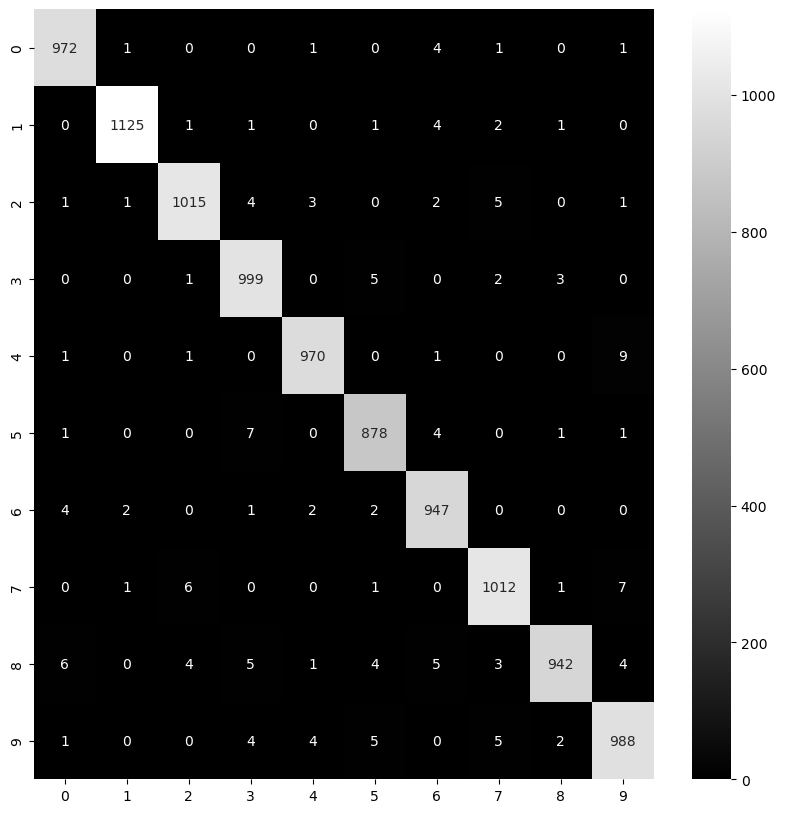

In [10]:
con_mat=confusion_matrix(y_testdigima,y_pred_classes)
plt.figure(figsize=(10,10))
plt.style.use('seaborn-v0_8-deep')
sb.heatmap(con_mat,annot=True,annot_kws={'size':10},fmt='d',cmap='gray')

In [11]:
classi_report=classification_report(y_testdigima,y_pred_classes)
print(classi_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted: 4


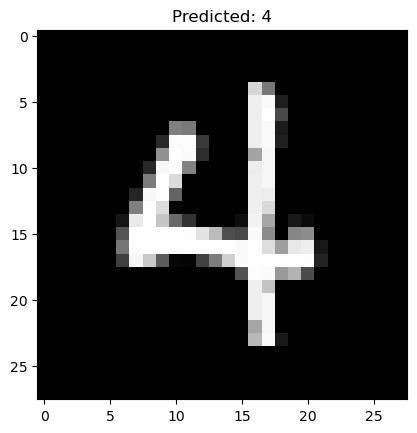

In [27]:
y_predict=model.predict(x_testdigima[5900].reshape(1,28,28,1))
y_pred_class=np.argmax(y_predict,axis=1)
plt.imshow(x_testdigima[5900].reshape(28,28),cmap='gray')
plt.title(f"Predicted: {y_pred_class[0]}")
print(f"Predicted: {y_pred_class[0]}")